In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTest1_11/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fM=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_graz_T*.nc')[0])

In [5]:
fD.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_NH4', 'RIV_LIV', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'MRT_DIAT', 'MRT_MYRI', 'MRT_PHY', 'MRT_MICZ'])

In [6]:
fP2=nc.Dataset(glob.glob('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestSNAPe3tn/SalishSea_1d_*_dian_T*.nc')[0])

In [7]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'PHYSTRNO3', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NO3RAD', 'ATF_NO3', 'SMS_NO3'])

In [8]:
fP2.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'ALLTRNO3', 'AFILTNO3', 'NO3_E3T', 'NO3SNAP', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NITR', 'NO3RADB', 'NO3RADN'])

In [9]:
allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ATF_NO3'][:,:,:,:],3),2),1)
radSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NO3RAD'][:,:,:,:],3),2),1)
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['REM_NO3'][:,:,:,:],3),2),1)
PPSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PPDIATNO3V'][:,:,:,:]+\
                                             fP.variables['PPPHYNO3V'][:,:,:,:]+\
                                             fP.variables['PPMRUBNO3V'][:,:,:,:]),3),2),1)
PPSumB=-1*np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PRD_NO3'][:,:,:,:],3),2),1)
PPDSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PPDIATNO3V'][:,:,:,:]),3),2),1)
PPPSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PPPHYNO3V'][:,:,:,:]),3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['RIV_NO3'][:,:,:,:],3),2),1)
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)-rivSum-nitrSum+PPSum

In [10]:
physSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
allSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['ALLTRNO3'][:,:,:,:],3),2),1)
afiltSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['AFILTNO3'][:,:,:,:],3),2),1)
radSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['NO3RADB'][:,:,:,:],3),2),1)+\
       np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['NO3RADN'][:,:,:,:],3),2),1)
no3Sum2=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP2.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nitrSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['NITR'][:,:,:,:],3),2),1)
PPSum2=np.sum(np.sum(np.sum(tmaskSOG*(fP2.variables['PPDIATNO3V'][:,:,:,:]+\
                                             fP2.variables['PPPHYNO3V'][:,:,:,:]+\
                                             fP2.variables['PPMRUBNO3V'][:,:,:,:]),3),2),1)
PPDSum2=np.sum(np.sum(np.sum(tmaskSOG*(fP2.variables['PPDIATNO3V'][:,:,:,:]),3),2),1)
PPPSum2=np.sum(np.sum(np.sum(tmaskSOG*(fP2.variables['PPPHYNO3V'][:,:,:,:]),3),2),1)
rivSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['RIVNO3'][:,:,:,:],3),2),1)

In [11]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
no3diff2=(no3Sum2[1:]-no3Sum2[:-1])/(24*3600)
#no3diff2=np.concatenate((no3diff,[(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fT.variables['NO3_E3T'][-1,:,:,:])))-no3sum[-1])/(23*3600)]))

In [12]:
afiltSum

masked_array(data=[-76.01338195800781, -23.846433639526367,
                   10.215202331542969, 57.57191848754883,
                   3.782917022705078],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [13]:
np.max(radSum),np.min(radSum),np.max(radSum2),np.min(radSum2)

(0.0, 0.0, 0.0030240756, 0.0)

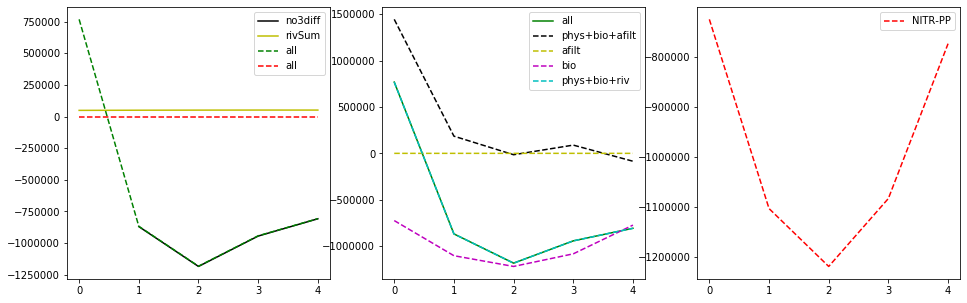

In [14]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(0,5),rivSum,'y-',label='rivSum')
ax[0].plot(range(0,5),allSum,'g--',label='all')
ax[0].plot(range(0,5),radSum,'r--',label='all')
#ax[0].plot(range(0,5),afiltSum,'b--',label='afilt')
ax[0].legend()
ax[1].plot(range(0,5),allSum,'g-',label='all')
ax[1].plot(range(0,5),physSum,'k--',label='phys+bio+afilt')
ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[2].legend()

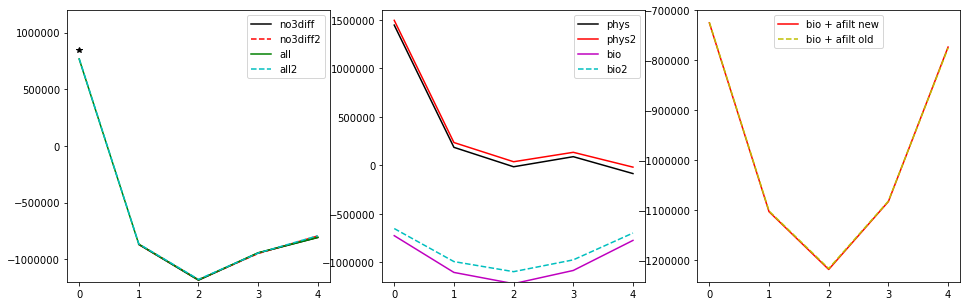

In [15]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(1,5),no3diff2,'r--',label='no3diff2')
ax[0].plot(range(0,5),allSum,'g-',label='all')
ax[0].plot(range(0,5),allSum2,'c--',label='all2')
ax[0].plot(0,allSum[0]*1.1,'k*')
ax[0].legend()
ax[0].set_ylim(-1200000,1200000)
ax[1].plot(range(0,5),physSum,'k-',label='phys')
ax[1].plot(range(0,5),physSum2,'r-',label='phys2')
ax[1].plot(range(0,5),nitrSum-PPSum,'m-',label='bio')
ax[1].plot(range(0,5),nitrSum2-PPSum2,'c--',label='bio2')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[1].set_ylim(-1200000,1600000)
ax[2].plot(range(0,5),nitrSum-PPSum+afiltSum,'r-',label='bio + afilt new')
ax[2].plot(range(0,5),nitrSum2-PPSum2+afiltSum2,'y--',label='bio + afilt old')
ax[2].legend()

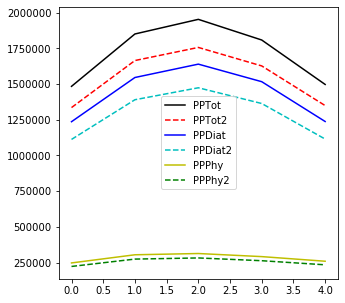

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(range(0,5),PPSum,'k-',label='PPTot')
ax.plot(range(0,5),PPSum2,'r--',label='PPTot2')
ax.plot(range(0,5),PPDSum,'b-',label='PPDiat')
ax.plot(range(0,5),PPDSum2,'c--',label='PPDiat2')
ax.plot(range(0,5),PPPSum,'y-',label='PPPhy')
ax.plot(range(0,5),PPPSum2,'g--',label='PPPhy2')
ax.legend()

In [17]:
(nitrSum2-PPSum2)/(nitrSum-PPSum)

masked_array(data=[0.8988048434257507, 0.8988580703735352,
                   0.8986636400222778, 0.8991879820823669,
                   0.9020698666572571],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [18]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)

In [19]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [20]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [21]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [22]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sutVA_NH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    #sutVD_DIAT=np.sum(np.sum(f.variables['DTY_DIAT'][:,:,0,:],2),1)
    print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_PHY', 'ATY_DIAT', 'ATY_MYRI', 'ATY_MICZ', 'DTY_NO3'])


In [23]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

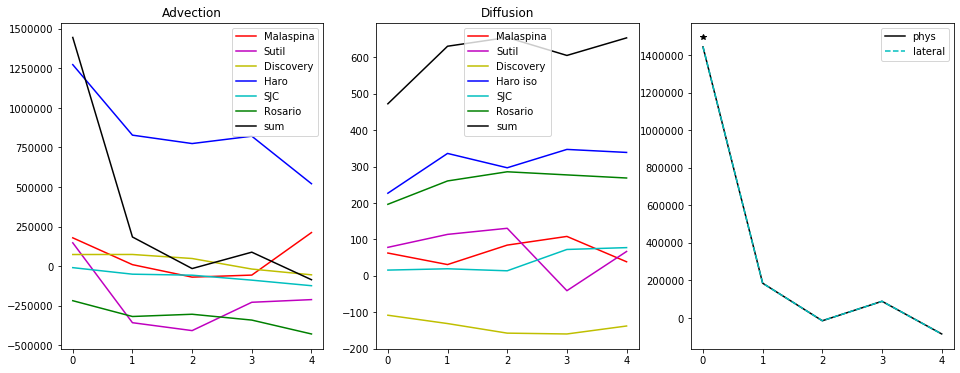

In [24]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
#ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSum[0],'k*')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [25]:
adv[0],dif[0],rivSum[0],adv[0]+dif[0],adv[0]+dif[0]+rivSum[0],physSum[0]

(1445583.1, 472.34808, 48516.04, 1446055.5, 1494571.5, 1444471.8)

In [26]:
## phys difference
adv+dif+rivSum-physSum

masked_array(data=[50099.75, 49394.875, 50634.0546875, 50922.28125,
                   50571.90625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [27]:
fg=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_graz_T_20150501-20150505.nc')

In [28]:
fg.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MRU_MYRI', 'MSZ_DIAT', 'MSZ_MYRI', 'MSZ_PHY', 'MSZ_MICZ', 'MSZ_PON', 'MIZ_DIAT', 'MIZ_MYRI', 'MIZ_PHY', 'MIZ_MICZ', 'MIZ_PON'])

In [29]:
np.min(fg.variables['MSZ_DIAT'][4,:,:,:]),np.max(fg.variables['MSZ_DIAT'][4,:,:,:])

(-18.268404, 0.0)

In [30]:
np.min(fg.variables['MRU_MYRI'][4,:,:,:]),np.max(fg.variables['MRU_MYRI'][4,:,:,:])

(0.0, 2.84062e-10)

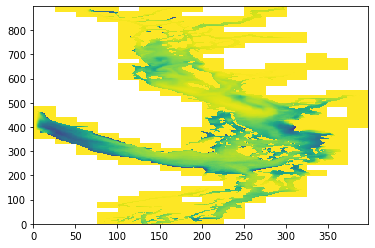

In [31]:
plt.pcolormesh(fg.variables['MSZ_DIAT'][4,0,:,:])

In [32]:
fg.close()

In [33]:
fd=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_dia1_T_20150501-20150505.nc')

In [34]:
fd.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_NH4', 'RIV_LIV', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'MRT_DIAT', 'MRT_MYRI', 'MRT_PHY', 'MRT_MICZ'])

In [35]:
np.min(fd.variables['RIV_NH4'][4,:,:,:]),np.max(fd.variables['RIV_NH4'][4,:,:,:])

(0.0, 5788.9)

In [36]:
np.min(fd.variables['RIV_NO3'][4,:,:,:]),np.max(fd.variables['RIV_NO3'][4,:,:,:])

(0.0, 10410.278)

In [37]:
np.min(fd.variables['REM_DON'][4,:,:,:]),np.max(fd.variables['REM_DON'][4,:,:,:])

(-13.354752, 0.0)

In [38]:
np.min(fd.variables['REM_PON'][4,:,:,:]),np.max(fd.variables['REM_PON'][4,:,:,:])

(-7.5636263, 0.0)

In [39]:
np.min(fd.variables['REM_NO3'][4,:,:,:]),np.max(fd.variables['REM_NO3'][4,:,:,:])

(0.0, 10.645361)

In [40]:
np.min(fd.variables['RIV_LIV'][4,:,:,:]),np.max(fd.variables['RIV_LIV'][4,:,:,:])

(0.0, 0.0)

In [41]:
temp=fP.variables['PPDIATNO3V'][4,:,:,:]+fP.variables['PPPHYNO3V'][4,:,:,:]+fP.variables['PPMRUBNO3V'][4,:,:,:]

In [42]:
np.min(temp),np.max(temp)

(0.0, 24.058239)

In [43]:
np.min(fd.variables['PRD_NO3'][4,:,:,:]),np.max(fd.variables['PRD_NO3'][4,:,:,:])

(-24.05824, 0.0)

In [44]:
fk=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_20150501-20150505.nc')

In [45]:
fk.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATZ_NO3', 'VMIXNO3', 'WLDFNO3'])

In [46]:
np.min(fk.variables['ATZ_NO3'][4,:,:,:]),np.max(fk.variables['ATZ_NO3'][4,:,:,:])

(-21702.229, 41891.555)

In [47]:
np.min(fk.variables['VMIXNO3'][4,:,:,:]),np.max(fk.variables['VMIXNO3'][4,:,:,:])

(-0.0012865806, 0.13866492)